### Shanghai Rental Data 

This data is scrapied from Lianjia.com (as of 10/01/2020). The csv files contains name, rental type, # of beds, price, longitude, latitude, balcony, deposit, apartment, rent_description, touring, transportation, independent bath, furnished, new listing, size, orientation, leve, elevator, parking and amenities information.

Attributes:
- name: name of listing
- type: sublease or entire leasing (all entire)
- beds: bedroom number
- price
- lon/lat: coordinates
- balcony, deposit(whether has deposit policy), apartment, rent_description, touring availability, close to transportation, independent bath, furnished, new listing: NO-0, YES-1.
- size: square meters
- orientation: facing of the windows, south-1, southeast-2, east-3, north-4, southwest-5, west-6, northwest-7, northeast-8, unknown-0
- level: levels of the listing, basement-0, low level(1-15)-1, mid level(15-25)-2, high level(>25)-3
- parking: no parking-0, extra cost avalaible-1, free parking-2
- amenities: amenities number 

In [315]:
import pandas as pd
import numpy as np

In [316]:
df = pd.read_csv('lianjia_shanghai.csv', sep =',', encoding='utf_8_sig', header=None)

In [317]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,三兴小区,整租,1,4500.0,121.466522,31.258257,0,0,0,0,...,1,0,1,0,31,北,低楼层/7层,无,暂无数据,5
1,华龙大酒店,整租,1,3700.0,121.458494,31.262110,0,0,0,0,...,1,0,0,0,43,南,中楼层/16层,无,暂无数据,0
2,协和大厦,整租,2,8500.0,121.464014,31.265904,0,0,0,0,...,1,0,0,0,92,南,中楼层/20层,有,暂无数据,7
3,安源小区,整租,2,8200.0,121.457048,31.251189,0,0,0,0,...,0,0,1,0,78,南,低楼层/21层,有,暂无数据,8
4,和泰花园,整租,2,9000.0,121.457915,31.263993,0,0,0,0,...,1,0,0,0,93,南,低楼层/17层,有,租用车位,8


### ETL

ETL process, clean and translate the dataframe into English.

In [400]:
def cleanRental(df):
    # drop duplicates
    df_copy = df.copy()
    df_copy = df_copy.drop_duplicates()
    #rename columns 
    cols = ['name', 'type', 'beds', 'price', 'lon', 'lat', 'balcony', 'deposit', 'apartment', 'rent_description', 
            'touring', 'close_to_transportation', 'independent_bath', 'furnished', 'new_listing', 'size', 
            'orientation', 'level', 'elevator', 'parking', 'amenities']
    df_copy.columns = cols
    # remove type since it's all entire apartment
    df_copy.drop('type', axis=1, inplace=True)
    # clean beds type unreadable
    df_copy.drop(10811, axis=0, inplace=True)
    df_copy.beds = df_copy.beds.astype(int)
    # translate orientation
    df_copy.orientation = df_copy.orientation.apply(lambda x: x.split(' ')[0])
    rep = {'南': 1, '东南': 2, '东': 3, '北': 4, '西南': 5, '西': 6, '西北': 7, '东北':8, '未知': 0}
    df_copy.orientation.replace(rep, inplace=True)
    # clean levels 
    df_copy.level = df_copy.level.apply(lambda x: x.split('/')[0])
    df_copy.level.replace({'地下室': 0, '低楼层': 1, '中楼层': 2, '高楼层':3}, inplace=True)
    #df_copytranslate elevator
    df_copy.elevator.replace({'无':0, '有':1}, inplace=True)
    # translate parking info
    df_copy.parking.replace({'暂无数据': 0, '租用车位': 1, '免费使用': 2}, inplace=True)
    # drop balcony apartment, and independent bath since it's all none
    df_copy.drop(['balcony','independent_bath', 'apartment'], axis=1, inplace=True)
    return df_copy

In [401]:
df_clean = cleanRental(df)

In [402]:
df_clean.head()

,name,beds,price,lon,lat,deposit,rent_description,touring,close_to_transportation,furnished,new_listing,size,orientation,level,elevator,parking,amenities
0,三兴小区,1,4500.0,121.466522,31.258257,0,0,1,1,1,0,31,4,1,0,0,5
1,华龙大酒店,1,3700.0,121.458494,31.262110,0,0,1,1,0,0,43,1,2,0,0,0
2,协和大厦,2,8500.0,121.464014,31.265904,0,0,1,1,0,0,92,1,2,1,0,7
3,安源小区,2,8200.0,121.457048,31.251189,0,0,0,0,1,0,78,1,1,1,0,8
4,和泰花园,2,9000.0,121.457915,31.263993,0,0,0,1,0,0,93,1,1,1,1,8


In [403]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10994 entries, 0 to 10998
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   name                     10994 non-null  object 
 1   beds                     10994 non-null  int64  
 2   price                    10994 non-null  float64
 3   lon                      10994 non-null  float64
 4   lat                      10994 non-null  float64
 5   deposit                  10994 non-null  int64  
 6   rent_description         10994 non-null  int64  
 7   touring                  10994 non-null  int64  
 8   close_to_transportation  10994 non-null  int64  
 9   furnished                10994 non-null  int64  
 10  new_listing              10994 non-null  int64  
 11  size                     10994 non-null  int64  
 12  orientation              10994 non-null  int64  
 13  level                    10994 non-null  int64  
 14  elevator              

In [404]:
df_clean.describe()

,beds,price,lon,lat,deposit,rent_description,touring,close_to_transportation,furnished,new_listing,size,orientation,level,elevator,parking,amenities
count,10994.000000,10994.000000,10994.000000,10994.000000,10994.000000,10994.000000,10994.000000,10994.000000,10994.000000,10994.000000,10994.000000,10994.000000,10994.000000,10994.000000,10994.000000,10994.000000
mean,2.286429,10230.316900,121.421169,31.202792,0.004821,0.000728,0.264781,0.499727,0.617155,0.159360,104.530471,1.247317,2.005639,0.498090,0.355194,6.059942
std,1.094175,14199.284667,0.114319,0.100173,0.069268,0.026967,0.441236,0.500023,0.486103,0.366028,89.769158,0.908562,0.819554,0.500019,0.583590,3.338066
min,0.000000,1000.000000,121.017122,30.718873,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,4500.000000,121.366116,31.157198,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.000000,1.000000,1.000000,0.000000,0.000000,4.000000
50%,2.000000,6500.000000,121.432420,31.214656,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,86.000000,1.000000,2.000000,0.000000,0.000000,7.000000
75%,3.000000,11000.000000,121.481756,31.256547,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,124.000000,1.000000,3.000000,1.000000,1.000000,8.000000
max,9.000000,500000.000000,121.929623,31.533224,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3218.000000,8.000000,3.000000,1.000000,2.000000,10.000000


### Exploratory analysis - Data visualization

In [389]:
# import packages
import seaborn as sns
import matplotlib.pyplot as plt
import folium
import branca.colormap as cm
import matplotlib as mpl
#ffrom sklearn.preprocessing import MinMaxScaler

%matplotlib inline

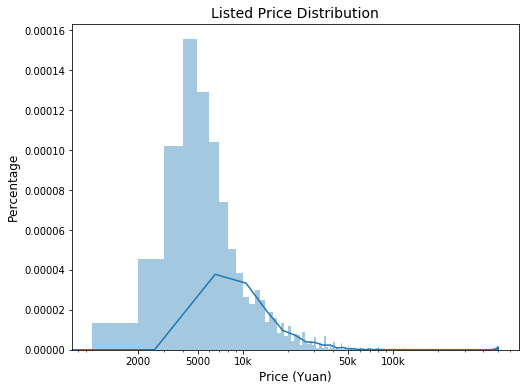

In [324]:
# visualize price distribution 
plt.figure(figsize=(8, 6))
sns.distplot(df_clean.price, bins=500, kde=True)
plt.xscale('log') # Log transform the price 
plt.xticks([2000, 5000, 10000, 50000, 100000], ['2000', '5000', '10k', '50k', '100k'])
plt.ylabel('Percentage', fontsize=12)
plt.xlabel('Price (Yuan)', fontsize=12)
plt.title('Listed Price Distribution', fontsize=14);

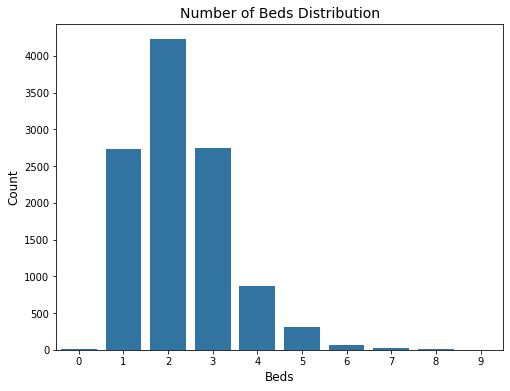

In [325]:
# visualize beds distribution
plt.figure(figsize=(8, 6))
sns.countplot(df_clean.beds, color=sns.color_palette()[0])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Beds', fontsize=12)
plt.title('Number of Beds Distribution', fontsize=14);

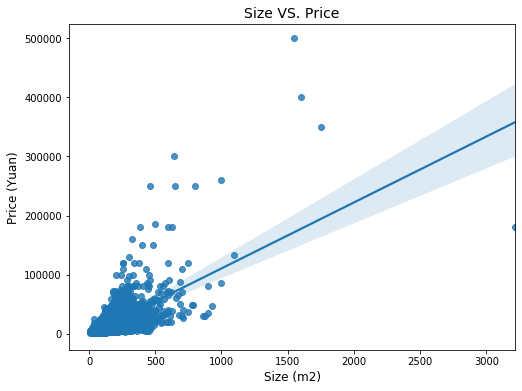

In [326]:
# visualize relationship between size and price
plt.figure(figsize=(8, 6))
sns.regplot(x='size', y='price', data=df_clean)
plt.ylabel('Price (Yuan)', fontsize=12)
plt.xlabel('Size (m2)', fontsize=12)
plt.title('Size VS. Price', fontsize=14);

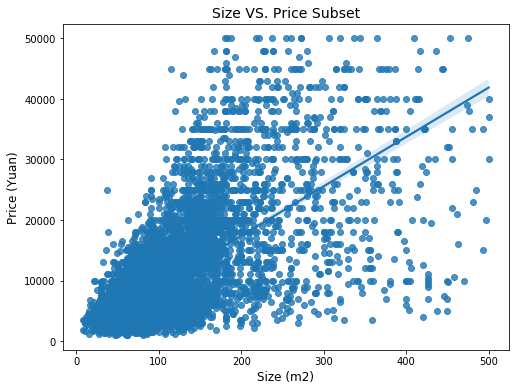

In [327]:
# subset price and size and check the plot
df_sub = df_clean[(df_clean.price <= 50000) & (df_clean['size']<= 500)]
plt.figure(figsize=(8, 6))
sns.regplot(x='size', y='price', data=df_sub)
plt.ylabel('Price (Yuan)', fontsize=12)
plt.xlabel('Size (m2)', fontsize=12)
plt.title('Size VS. Price Subset', fontsize=14);

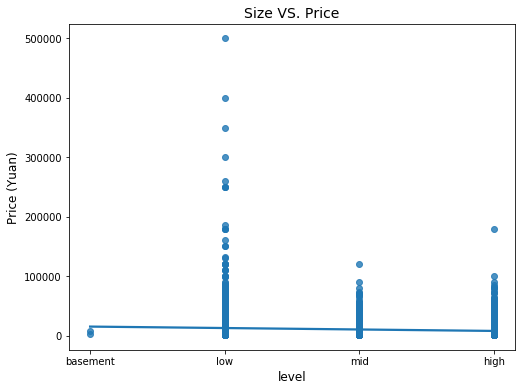

In [328]:
# visualize relationship between level and price 
plt.figure(figsize=(8, 6))
sns.regplot(x='level', y='price', data=df_clean)
plt.ylabel('Price (Yuan)', fontsize=12)
plt.xlabel('level', fontsize=12)
plt.xticks([0, 1, 2, 3], ['basement', 'low', 'mid', 'high'])
plt.title('Size VS. Price', fontsize=14);

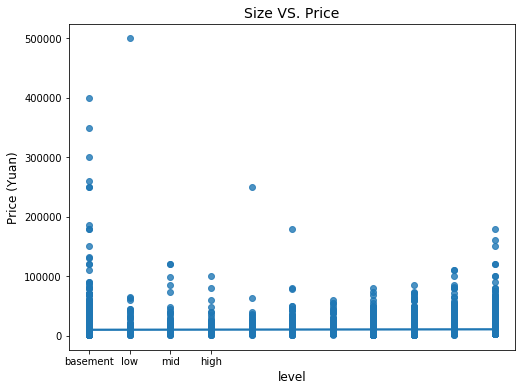

In [329]:
# visualize relationship between amenities and price 
plt.figure(figsize=(8, 6))
sns.regplot(x='amenities', y='price', data=df_clean)
plt.ylabel('Price (Yuan)', fontsize=12)
plt.xlabel('level', fontsize=12)
plt.xticks([0, 1, 2, 3], ['basement', 'low', 'mid', 'high'])
plt.title('Size VS. Price', fontsize=14);

import matplotlib as mpl
fig, ax = plt.subplots(figsize=(6, 1))
fig.subplots_adjust(bottom=0.5)
cmap = mpl.cm.RdBu
norm = mpl.colors.Normalize(np.log(df_clean.price).min(), np.log(df_clean.price).max())
n_cmap = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)

In [391]:
# build interactive map to see the density of listing
m = folium.Map(location=[31.2389, 121.4992], zoom_start=11)
cmap = cm.linear.RdBu_11.scale(df_clean.price.min(), df_clean.price.max())
for lat, lon, price in zip(df_clean['lat'], df_clean['lon'], df_clean.price):
     folium.CircleMarker(location=[lat, lon],
                            radius=3,
                            color=None,
                            fill=True,
                            fill_opacity=0.5,
                            fill_color=cmap(price),
                           ).add_to(m)
m.save('lianjia_shanghai.html')

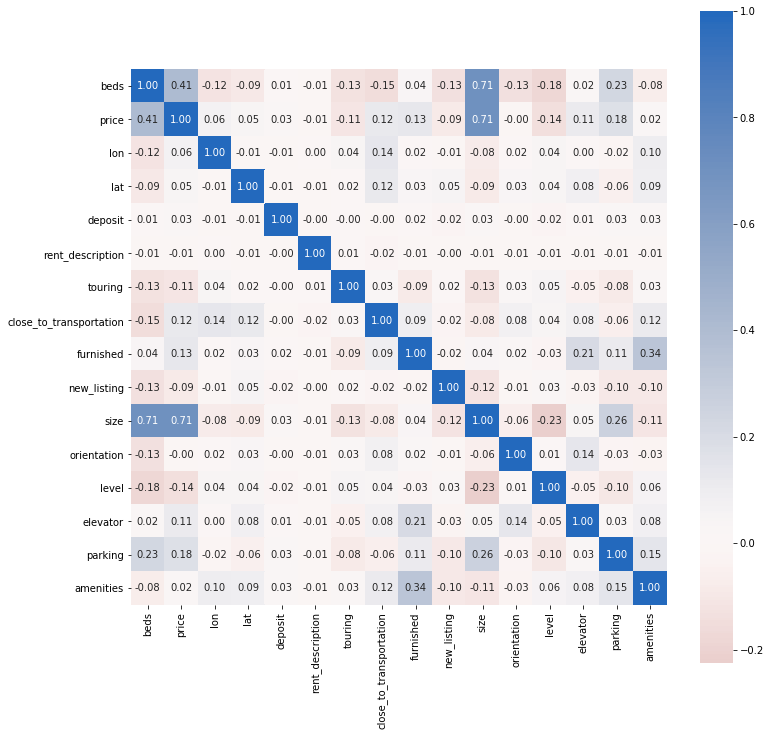

In [405]:
# last check correlation
plt.figure(figsize=(12, 12))
sns.heatmap(df_clean.corr(), square=True, annot=True, fmt = '.2f', cmap = 'vlag_r', center=0);